# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



# Zad 1

In [1]:
from configs import *
from read_process import *
from calculations import *
from visualizations import *

In [2]:
dfs = {}
years = YEARS
for year in years:
    dataframe = download_gios_archive(year, GIOS_URL_IDS[year], GIOS_PM25_FILES[year])
    print(f"Processing for {year}")
    dfs[year] = process_raw_df(dataframe, year)
metadata = download_metadata(META_ID)

Processing for 2015
Processing for 2018
Processing for 2021
Processing for 2024


In [3]:
filtered_metadata = process_metadata(metadata)
#bierzemy pod uwage te wiersze gdzie zaszła zmiana kodów
metadata_subset = filtered_metadata.dropna(subset=[OLD_STATION_NAME, NEW_STATION_NAME])
raw_mapper = dict(zip(metadata_subset[OLD_STATION_NAME],metadata_subset[NEW_STATION_NAME]))
code_mapper = atomize_dict(raw_mapper)

In [4]:
for year, df in dfs.items():
    dfs[year] = update_codes(df, code_mapper)

In [5]:
final_df = merge_years(dfs, metadata)

In [7]:
final_df.to_csv("merged_DF.csv")

In [9]:
final_df

City                Jelenia Góra      Wrocław                 Bydgoszcz  \
Station_Code        DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna   
Measurment                                                                
2024-12-31 20:00:00         48.3         51.4         27.7     5.400000   
2024-12-31 21:00:00         67.0         65.5         19.9     7.700000   
2024-12-31 22:00:00         72.7         30.2         17.4    14.500000   
2024-12-31 23:00:00         79.9         36.0         23.6    15.100083   
2024-12-31 23:59:59         67.9         50.4         35.4    15.700000   

City                                   Lublin         Łódź       Zgierz  \
Station_Code        KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
Measurment                                                                
2024-12-31 20:00:00         34.1         26.3         33.3         49.5   
2024-12-31 21:00:00         34.6         27.5         34.0         48.7   
2024-12-31 22:00:00         29.3         26.9         31.7         48.1   
2024-12-31 23:00:00         16.0         23.5         26.8         38.4   
2024-12-31 23:59:59         13.4         21.4         37.3         45.5   

City                Zielona Góra       Kraków  ...    Białystok     Przemyśl  \
Station_Code        LuZielKrotka MpKrakAlKras  ... PdBialUpalna PkPrzemGrunw   
Measurment                                     ...                             
2024-12-31 20:00:00         15.9         57.0  ...         10.0         19.7   
2024-12-31 21:00:00         16.1         58.7  ...         18.0         19.3   
2024-12-31 22:00:00         15.9         67.9  ...         15.0         17.4   
2024-12-31 23:00:00         12.5         75.3  ...         13.0         15.1   
2024-12-31 23:59:59         14.7         75.5  ...         15.0         15.1   

City                      Gdańsk  Kościerzyna     Katowice  Złoty Potok  \
Station_Code        PmGdaLeczkow PmKosTargowa SlKatoKossut SlZlotPotLes   
Measurment                                                                
2024-12-31 20:00:00         11.2         14.1         20.3         23.8   
2024-12-31 21:00:00         14.0         12.6         20.1         28.4   
2024-12-31 22:00:00         15.8         10.9         27.3         22.5   
2024-12-31 23:00:00         16.1         10.2         26.4         25.3   
2024-12-31 23:59:59         17.4          8.0         27.0         20.6   

City                     Olsztyn       Kalisz     Szczecin               
Station_Code        WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud  
Measurment                                                               
2024-12-31 20:00:00         16.0         25.4          8.4         14.0  
2024-12-31 21:00:00         19.3         25.0         12.8         12.7  
2024-12-31 22:00:00         26.9         24.0         20.7         12.1  
2024-12-31 23:00:00         23.0         23.6         13.4         12.7  
2024-12-31 23:59:59         23.4         25.0         15.6         11.5  

[5 rows x 30 columns]

# Zad 2
## Średnie miesięczne + trend dla miast
Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [10]:
monthly_cities = group_monthly_cities(final_df)
monthly_cities.head()

/home/ejhuus/Studia/ZTP/projekt3/calculations.py:10: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  monthly = (final_df.groupby([final_df.index.year, final_df.index.month], axis=0).mean())
/home/ejhuus/Studia/ZTP/projekt3/calculations.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_cities = monthly.groupby(level='City', axis=1).mean()


City                   Białystok  Bydgoszcz     Gdańsk  Jelenia Góra  \
Measurment Measurment                                                  
2015       1           22.421938  25.332167  15.310290     26.092398   
           2           40.255952  46.715164  21.431016     41.771110   
           3           30.956317  28.715162  17.494755     28.600913   
           4           13.361111  18.129707  10.505666     11.895732   
           5           10.413977  12.982953   8.403376      8.093733   

City                      Kalisz   Katowice  Kościerzyna     Kraków  \
Measurment Measurment                                                 
2015       1           30.194623  30.932681    36.901370  41.553164   
           2           48.822975  56.135774    47.714890  66.837065   
           3           37.407209  39.466406    38.406111  50.300004   
           4           20.317947  23.540604    21.909223  27.704372   
           5           19.549863  17.996449    13.273693  22.213582   

City                   Kędzierzyn-Koźle  Legionowo  ...      Radom    Siedlce  \
Measurment Measurment                               ...                         
2015       1                  31.290601  33.487752  ...  37.357841  23.887958   
           2                  53.037672  61.852679  ...  60.799266  44.441037   
           3                  38.139914  56.029032  ...  40.550494  36.093555   
           4                  20.908910  23.214722  ...  20.450965  14.482860   
           5                  15.339657  19.364636  ...  15.435304  14.957196   

City                    Szczecin   Warszawa    Wrocław     Zgierz  \
Measurment Measurment                                               
2015       1           18.813956  24.917226  31.919640  26.475356   
           2           31.918812  43.459365  44.043704  44.347470   
           3           25.415686  34.128170  34.341790  35.235215   
           4           13.878272  17.081654  17.274869  16.080556   
           5            9.896753  16.169848  15.871011  10.037634   

City                   Zielona Góra  Złoty Potok       Łódź   Żyrardów  
Measurment Measurment                                                   
2015       1              24.864497    20.538812  27.223338  40.874947  
           2              35.717292    36.606884  41.152630  65.455417  
           3              32.348464    24.132065  30.433775  50.802814  
           4              15.526083    13.769159  15.263889  21.455759  
           5              13.674646    11.364963  12.317204  18.701176  

[5 rows x 25 columns]

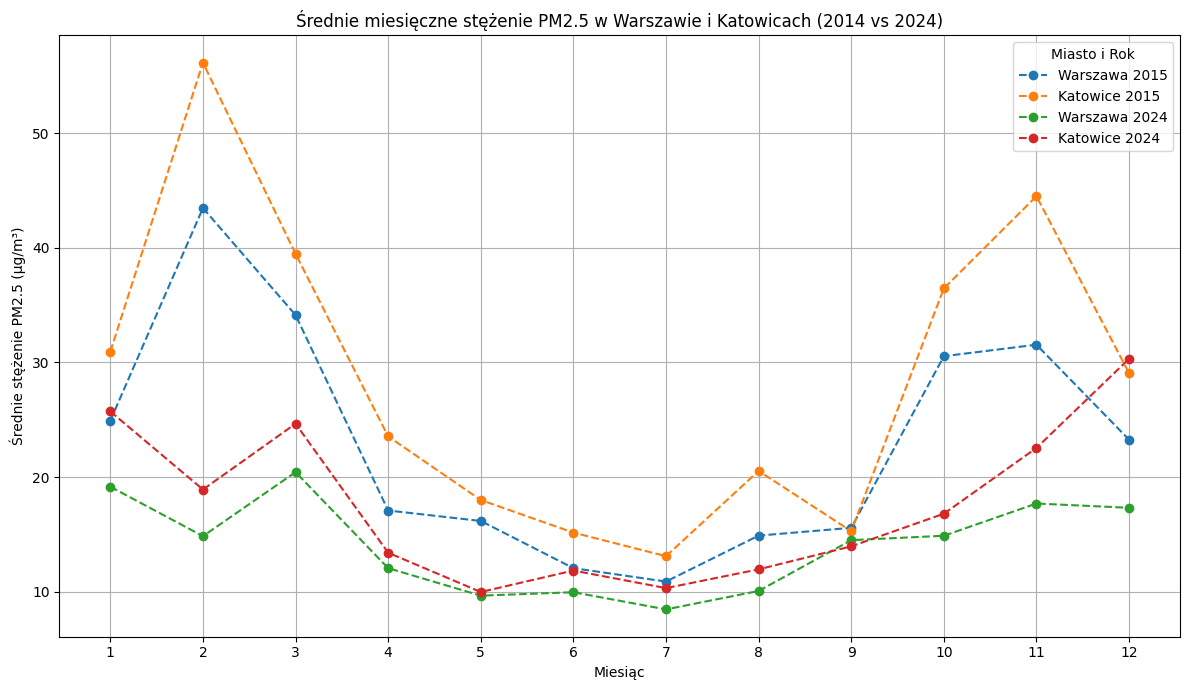

In [11]:
plot_city_trends(monthly_cities, EX2_YEARS, EX2_CITIES)

## Interpretacja zadania 2-ego
Po pierwsze możemy zauważyć, że w niektórych miesiącach poziomy zanieczyszczeń są o wiele większe niż innych np. w okresach zimowych średnie stężenie PM2.5 (najwyższy odczyt w lutym) jest zauważalnie większe niż w okresie letnim. To oczywiście spowodowane jest paleniem min. w piecach w gospodarstwach domowych.
Co ciekawsze w latach 2014 ogólny średni poziom zanieczysczeń jest większy niż w latach 2024 (linie trendu są wyżej), możemy, więc zauważyć efekty przepisów mających na celu ochronę środowiska, a także wymianę min. starych pieców grzewczych na nowe.
Ostatnią sprawą może być to, że średni poziom PM2.5 jest mniejszy w Warszawie niżeli w Katowicach (być może spowodowane tym, że na Śląsku w gospodarstwach domowych więcej było pieców węglowych).


# Zad 3
## Heatmapa miesięcznych średnich
Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

In [125]:
all_dfs = []
for year, df in dfs.items():
    # Dodajemy kolumnę z rokiem
    df_year = df.copy()
    df_year['Year'] = year
    all_dfs.append(df_year.reset_index())

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df = combined_df.set_index(['Measurment', 'Year'])

print("Informacje o połączonym DataFrame:")
combined_df

Informacje o połączonym DataFrame:


,,DsWrocAlWisn,KpWiktorowoG,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,LdLodzCzerni,LdZgieMielcz,LuZielKrotka,MpKrakAlKras,MpKrakBujaka,...,SlKatoPlebA4,SlRaciborzWPMOB,SlZywieKoper,WmDzialPolnaMOB,WmElkStadion,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew
Measurment,Year,,,,,,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,2014,152.0,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,2014,137.0,94.30,107.201928,121.629723,49.4912,210.364670,70.337502,NaN,104.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,2014,129.0,102.48,98.189431,59.189041,46.5652,66.425789,40.915695,NaN,91.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,2014,129.0,102.32,89.176935,58.038334,45.8128,53.999668,37.817917,NaN,89.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 05:00:00,2014,105.0,88.73,80.164439,59.658134,45.8128,52.239670,38.814861,NaN,83.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 20:00:00,2024,51.4,NaN,5.400000,34.100000,NaN,33.300000,49.500000,15.9,57.0,NaN,...,33.4,23.5,21.7,14.7,13.5,18.7,22.0,35.3,8.8,10.9
2024-12-31 21:00:00,2024,65.5,NaN,7.700000,34.600000,NaN,34.000000,48.700000,16.1,58.7,NaN,...,38.6,23.1,21.7,14.7,11.8,18.7,22.9,28.5,8.8,9.0
2024-12-31 22:00:00,2024,30.2,NaN,14.500000,29.300000,NaN,31.700000,48.100000,15.9,67.9,NaN,...,37.5,22.0,26.0,14.7,9.6,18.7,21.3,23.4,8.8,8.2


In [127]:
# Przekształcamy dane do formatu 'long' dla łatwiejszego grupowania
df_long = combined_df.stack(level=['City', 'Station_Code']).reset_index()
df_long.rename(columns={0: 'PM25_Value'}, inplace=True)

# Dodajemy kolumnę z miesiącem
df_long['Month'] = df_long['Measurment'].dt.month

# Grupujemy dane po mieście, roku i miesiącu, obliczając średnią
city_monthly_avg = df_long.groupby(['City', 'Year', 'Month'])['PM25_Value'].mean().reset_index()

print("Średnie miesięczne dla miast:")
display(city_monthly_avg.head())

ValueError: level should contain all level names or all level numbers, not a mixture of the two.

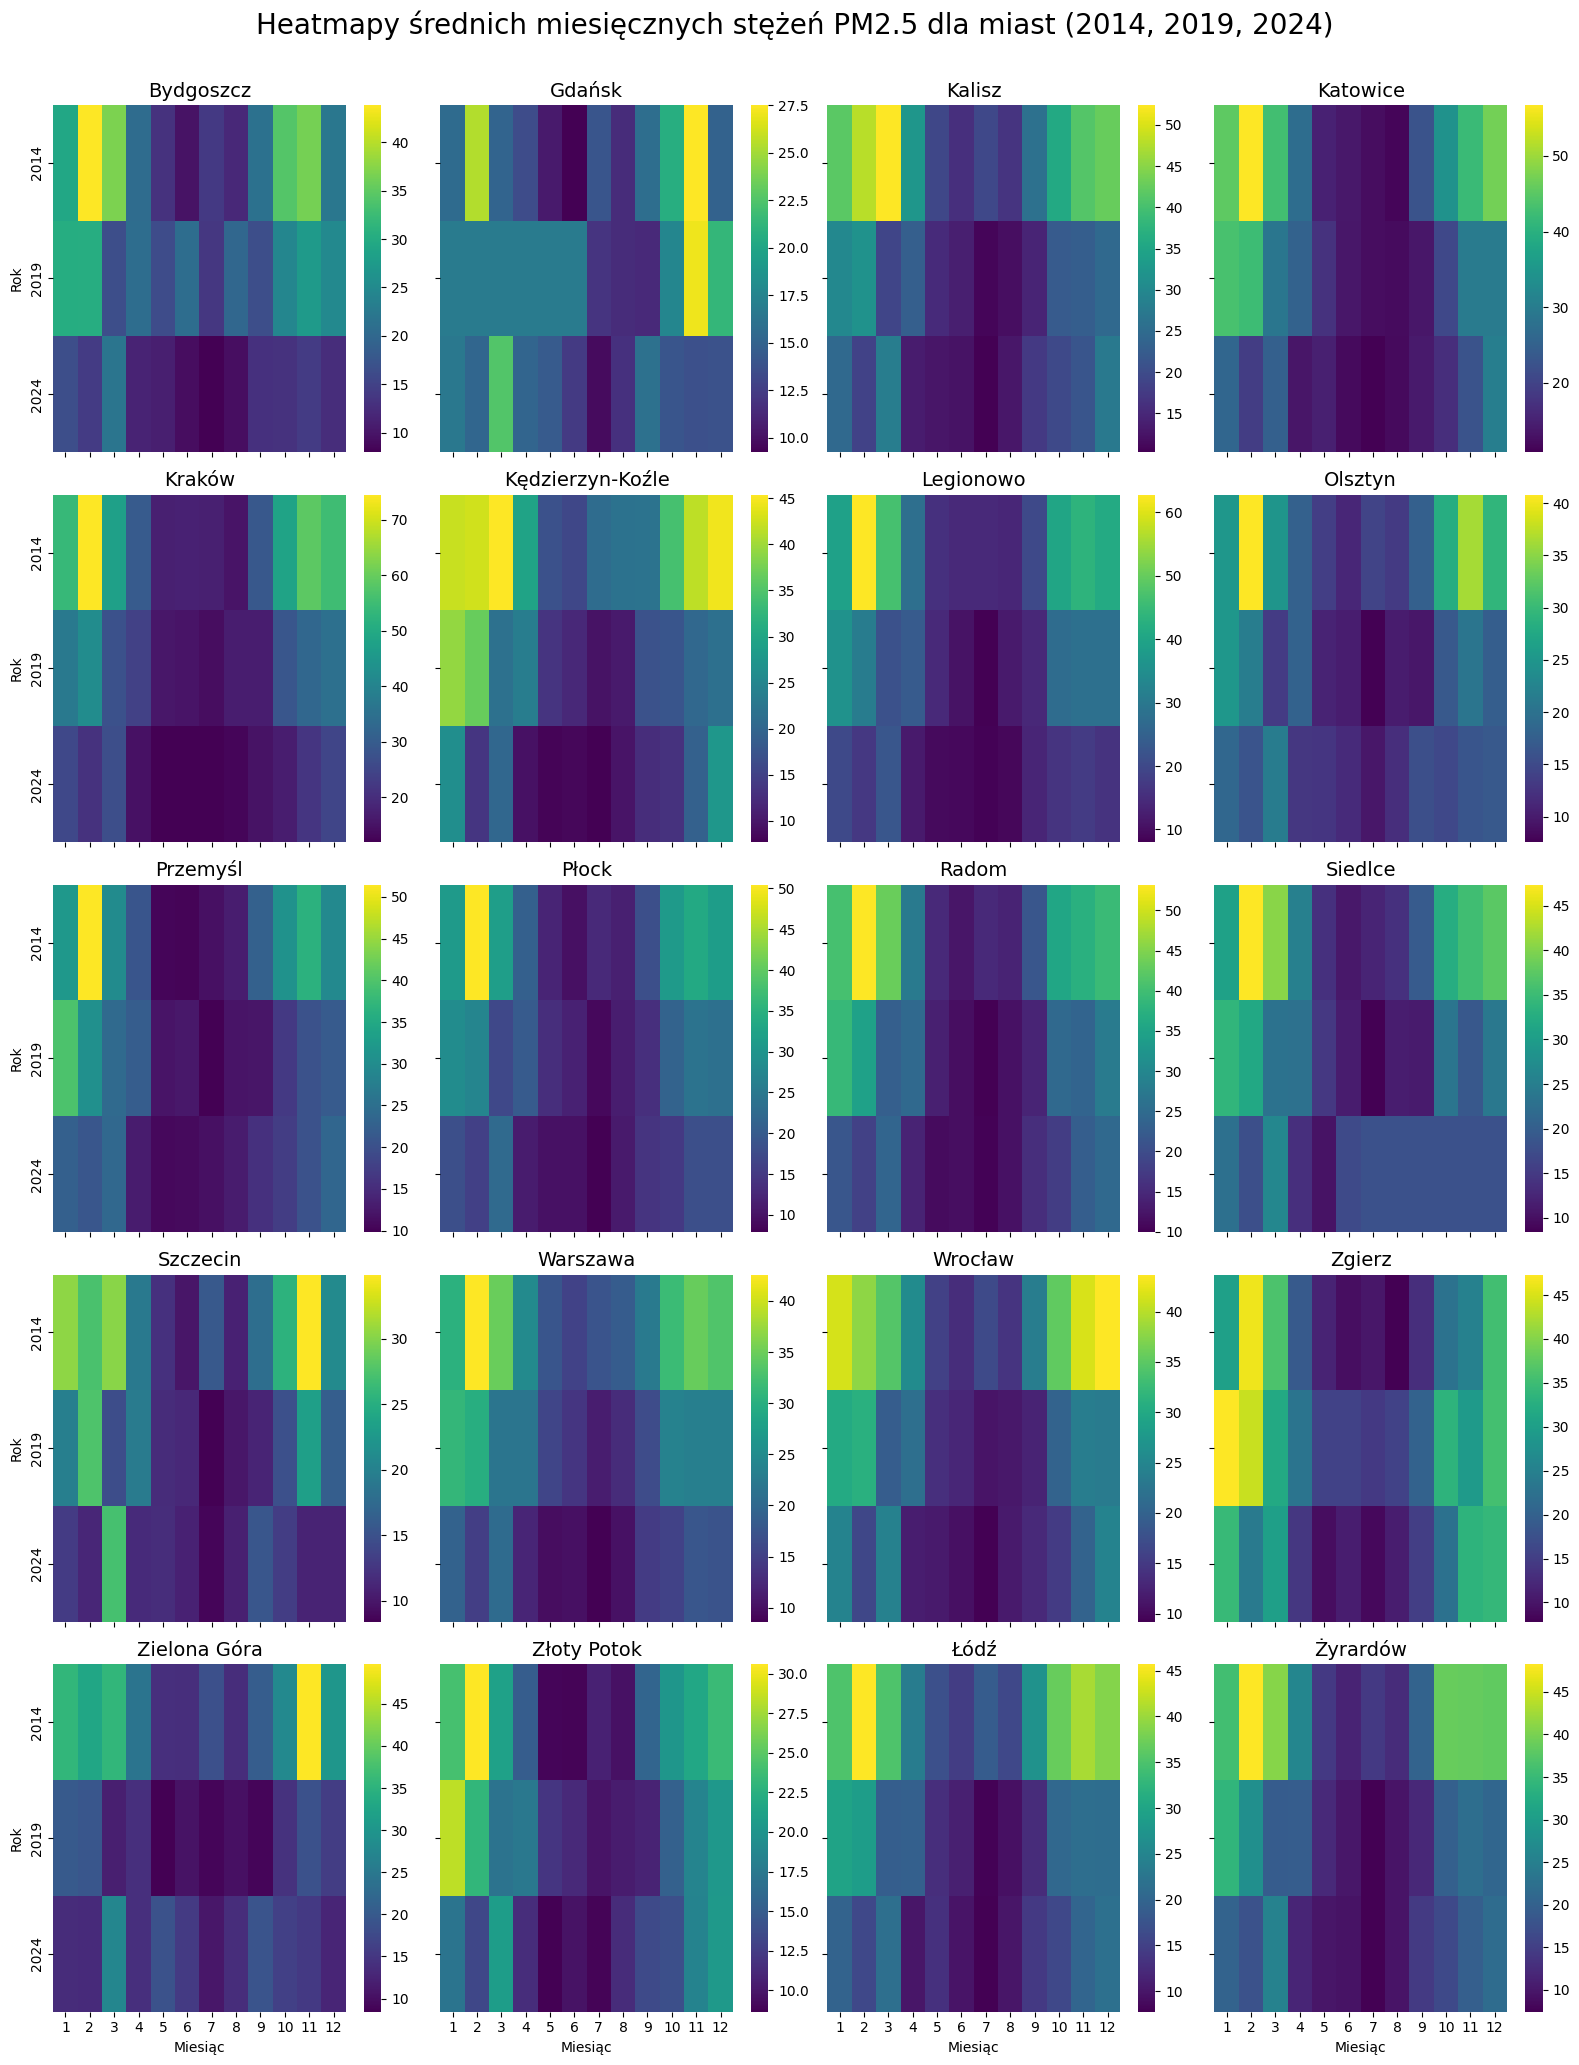

In [26]:
import seaborn as sns

# Tworzymy FacetGrid, gdzie każdy panel to jedno miasto
g = sns.FacetGrid(city_monthly_avg, col="City", col_wrap=4, height=4)

# Mapujemy heatmapę na każdy panel
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data.pivot(index='Year', columns='Month', values='PM25_Value'),
        cmap='viridis'
    )
)

g.set_titles("{col_name}", size=14)
g.set_axis_labels("Miesiąc", "Rok")
g.figure.suptitle('Heatmapy średnich miesięcznych stężeń PM2.5 dla miast (2014, 2019, 2024)', size=20, y=1.03)

plt.show()

## Interpretacja zadania 3-ego
Z tego wykresu jasno widać, że ogólna sytuacja z zanieczyszceniem PM2.5 ulega poprawieniu - widać to min. w Warszawie, Katowicach czy Szczecinie. Są jednak wyjątki, w Siedlcach nastąpiło znaczne pogorszenie warunków, a w Zgierzu także było więcej dni przekraczających normy. Ogólnie średnio widzimy mimo wszystko, że rok 2014 był najgorszy pod tym względem. 

Można zaobserwować również podobne trendy do tych wyłaniających się z poprzedniego zadania. Dla większości miast stężenia cząstek PM2.5 są najwyższe od września do kwietnia. Zmniejszają się one również w kolejnych rozpatrywanych co 5 latach. Z trendów tych najbardziej wyłamuje się Zgierz w którym stężenia wzrosły między rokiem 2014 a 2019 i pozostały relatywnie wysokie w roku 2024.

# Zad 4
## Dni z przekroczeniem normy (WHO)
Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

In [31]:
# Norma dobowa WHO dla PM2.5
WHO_NORM = 15

# Obliczamy średnie dobowe dla każdej stacji i roku
daily_means = {}
for year, df in dfs.items():
    daily_means[year] = df.resample('D').mean()

# Liczymy dni z przekroczeniem normy
exceeding_days = {}
for year, df_daily in daily_means.items():
    exceeding_days[year] = (df_daily > WHO_NORM).sum()

# Konwertujemy wyniki do DataFrame dla łatwiejszej analizy
exceeding_df = pd.DataFrame(exceeding_days)
exceeding_df = exceeding_df.reset_index()

print("Liczba dni z przekroczeniem normy:")
display(exceeding_df.head())

Liczba dni z przekroczeniem normy:


,City,Station_Code,2014,2019,2024
0,Wrocław,DsWrocAlWisn,274,181,136
1,Bydgoszcz,KpBydPlPozna,240,243,105
2,Łódź,LdLodzCzerni,300,186,128
3,Zgierz,LdZgieMielcz,191,265,199
4,Zielona Góra,LuZielKrotka,260,106,150


In [32]:
# Wybieramy 3 stacje z najmniejszą i 3 z największą liczbą dni z przekroczeniem w 2024
exceeding_2024 = exceeding_df.sort_values(by=2024)

# 3 stacje z najmniejszą liczbą dni
bottom_3_stations = exceeding_2024.head(3)
# 3 stacje z największą liczbą dni
top_3_stations = exceeding_2024.tail(3)

selected_stations = pd.concat([bottom_3_stations, top_3_stations])
selected_station_codes = selected_stations['Station_Code'].tolist()

print("3 stacje z najmniejszą liczbą dni z przekroczeniem normy w 2024:")
display(bottom_3_stations)
print("\n3 stacje z największą liczbą dni z przekroczeniem normy w 2024:")
display(top_3_stations)

3 stacje z najmniejszą liczbą dni z przekroczeniem normy w 2024:


,City,Station_Code,2014,2019,2024
21,Szczecin,ZpSzczAndrze,200,116,72
12,Warszawa,MzWarWokalna,244,170,102
1,Bydgoszcz,KpBydPlPozna,240,243,105



3 stacje z największą liczbą dni z przekroczeniem normy w 2024:


,City,Station_Code,2014,2019,2024
17,Katowice,SlKatoKossut,259,237,185
3,Zgierz,LdZgieMielcz,191,265,199
10,Siedlce,MzSiedKonars,246,206,287


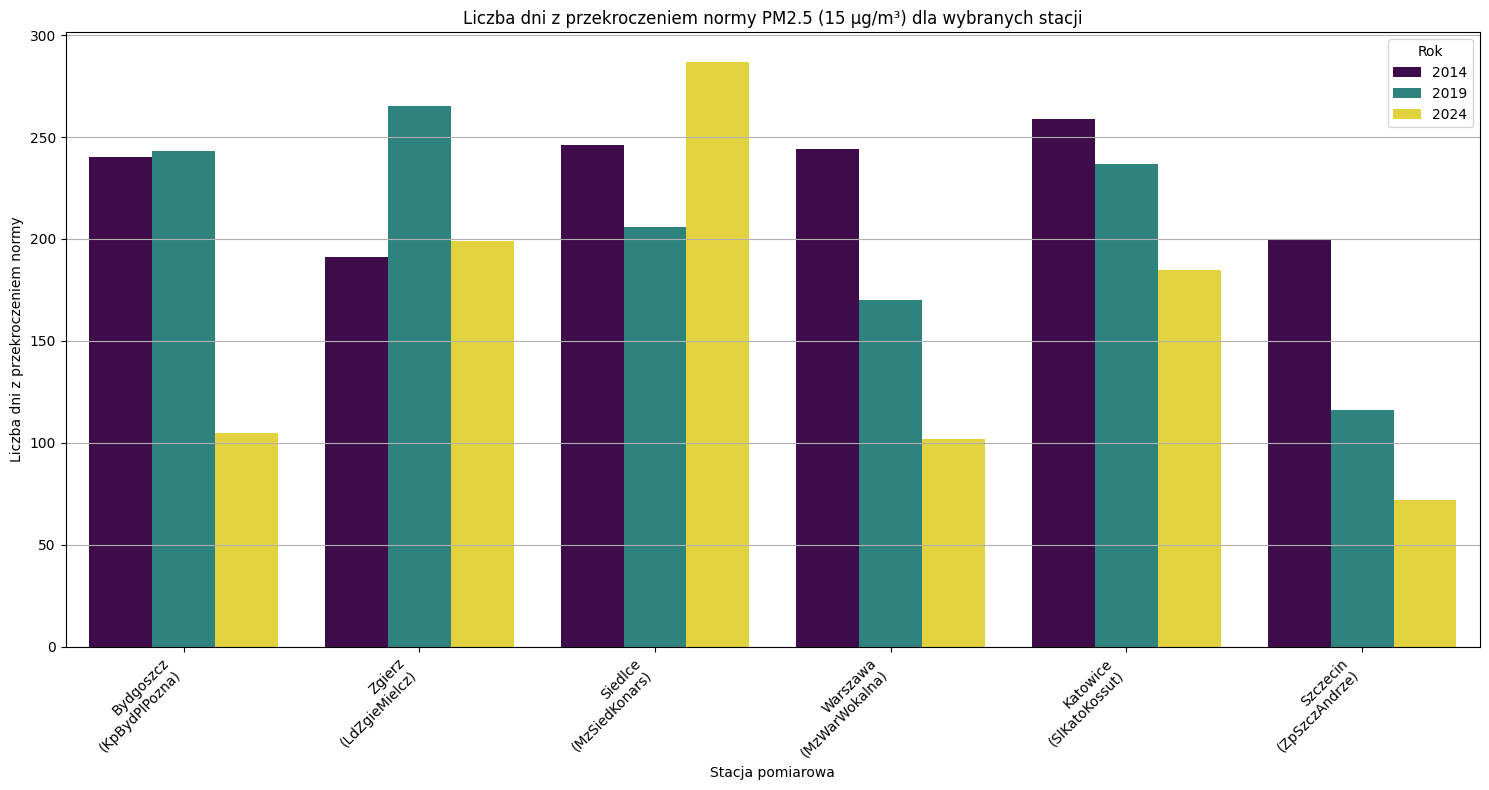

In [29]:
plot_data = exceeding_df[exceeding_df['Station_Code'].isin(selected_station_codes)]

# Przekształcamy dane do formatu 'long'
plot_data_long = plot_data.melt(
    id_vars=['City', 'Station_Code'],
    value_vars=[2014, 2019, 2024],
    var_name='Year',
    value_name='Exceeding_Days'
)

# Tworzymy etykiety dla osi X łącząc miasto i kod stacji
plot_data_long['Station_Label'] = plot_data_long['City'] + '\n(' + plot_data_long['Station_Code'] + ')'

# Rysowanie wykresu
plt.figure(figsize=(15, 8))
sns.barplot(
    data=plot_data_long,
    x='Station_Label',
    y='Exceeding_Days',
    hue='Year',
    palette='viridis'
)

plt.title('Liczba dni z przekroczeniem normy PM2.5 (15 µg/m³) dla wybranych stacji')
plt.xlabel('Stacja pomiarowa')
plt.ylabel('Liczba dni z przekroczeniem normy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rok')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## Interpretacja zadania 4-ego 
W 2014 różnice między miastami były znacznie mniejsze. Najmniej dni w których została przekroczona 
norma emisji (poniej 200) w wybranych miast miał wtedy Zgierz a najwięcej Katowice (ponad 250). Obraz ten zmienia się w 2024, gdzie różnica pomiędzy Siedlcami a Szczecinem wyniosła już około 200 dni. Z uwagi na zaobserowany już w poprzednich zadaniach spadek emisji w większości miast sytuacja na przestrzeni 10 lat uległa zmianie. Dwa z trzech miast o nawyższej liczbie dni z przkroczoną normą w 2024 znotowały ich wzrost na przestrzeni 10 lat, natomiast w trzecim przypadku (Katowice), wynik ten można przypisać wysokiemu efektowi bazy. W przypadku najlepiej wypadających miast w 2014 liczba zanieczyszczonych dni nie była dużo większa (maksymalnie ~60) od pozostałych. Relatywny sukces można przypisać, więc raczej spadkom emisji PM2.5, potencjanie związanym np. z wysiłkami termomodernizacyjnymi.